In [19]:
# import numpy as np
# np.random.seed(0)
# from sklearn import datasets
# import matplotlib.pyplot as plt
# %matplotlib inline
# import keras as ks 
# %config InlineBackend.figure_format ='retina'
# from keras.models import sequential
# from keras.layer import Dense
# from keras.optimizers import SGD

import tensorflow
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


In [20]:
# about dataset
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
y.shape, X.shape

((1000,), (1000, 2))

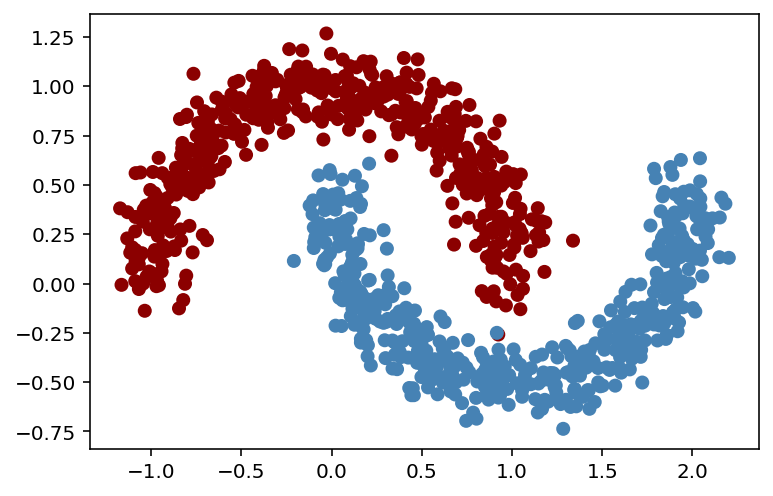

In [21]:
# visualize
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)

In [23]:
### Setting up our network
#Recall the structure of our example network from the previous notebook, where  sl  represents a layer of neurons in the network:

+ s1=2  (two input features, not counting one bias unit)
- s2=5  (five hidden units, not counting one bias unit)
+ s3=5  (five hidden units, not counting one bias unit)
- s4=2  (two output classes)

SyntaxError: invalid syntax (<ipython-input-23-2c2d3f6bc7ca>, line 4)

In [24]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(5, activation='relu', input_shape=(2, )))

# Add one hidden layer 
model.add(Dense(5, activation='relu'))


# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Defining the optimizer
In Keras, you must also specify an optimizer to use when training your model.
Our data set wasn't particularly large so this was a feasible option,
however in practice stochastic gradient descent is used.
This is when the model is trained on smaller, random batches of the training set.
This is also usually coupled with a smaller learning rate.
Here we will define a stochastic gradient descent optimizer with a learning
rate of 0.01 ( α , which we set to 0.5 in our previous example),
which should behave similarly. In Keras, a stochastic gradient descent optimizer object is SGD.

In [32]:
sgd = SGD(lr=0.1)

In [ ]:

### Loss function
Finally we must choose a loss function and "compile" our model. We will use a cross-entropy loss function .

In [31]:

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
### Training the model
We can now train our model using the model.fit() method. Usually this method prints a nice text-based indicator of the training
progress. We'll turn this off (verbose=0) since we're going to use a large number of iterations (nb_epoch=4000,
greater than our last example due to the smaller  α ). We can also easily capture information about the training process in
the History object returned by model.fit(). For good measure we'll also pass the shuffle=True so that our training data batches 
are shuffled before each pass.

In [33]:
history = model.fit(X[:500],y[:500], verbose=1, nb_epoch=4000, shuffle=True)

TypeError: fit() got an unexpected keyword argument 'nb_epoch'

In [29]:
plt.plot(history.history['loss'])

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
### Visualizing the results
Here we'll bring back our plot_decision_boundary function and have it use a divergent color map.

In [ ]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

In [ ]:
plot_decision_boundary(X, y, model, cmap='RdBu')